In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import UnivariateAnalysis, StatisticAnalysis, BivariateAnalysis
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pos = pd.read_csv('D:/Data Preparation final project group 2/Data/dseb63_POS_CASH_balance.csv')
pos.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


In [4]:
pos.shape

(8543375, 8)

In [5]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


In [6]:
pos.duplicated().sum()

0

In [7]:
stat = StatisticAnalysis(pos)

SK_ID_PREV                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           21863
CNT_INSTALMENT_FUTURE    21878
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
SK_ID_CURR                   0
dtype: int64


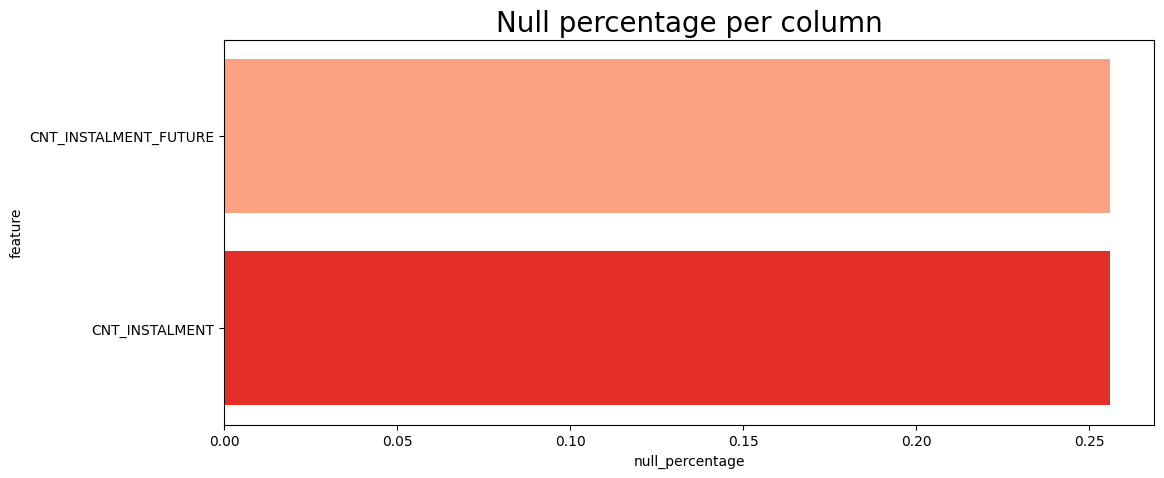

In [8]:
stat.check_null()

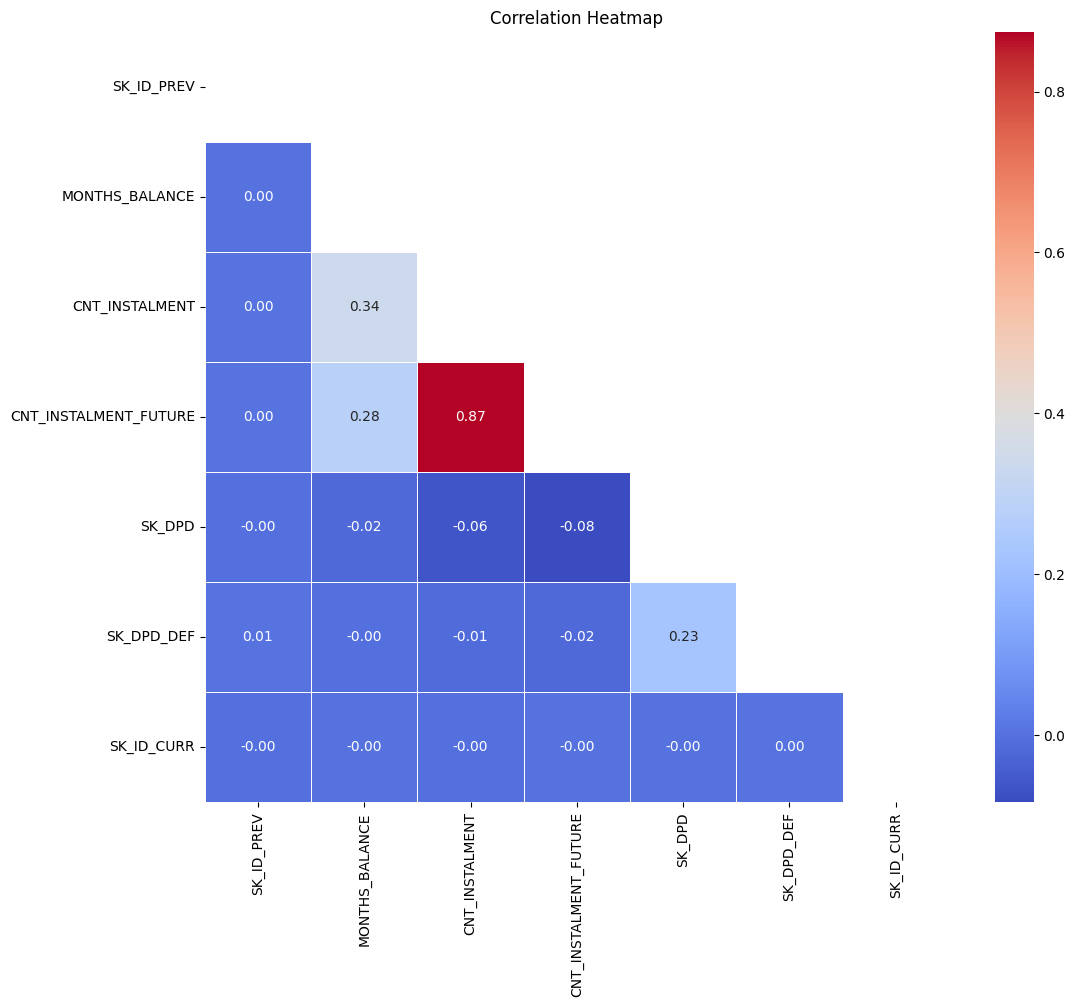

In [9]:
stat.correlation()

CNT_INSTALMENT_FUTURE and CNT_INSTALMENT are highly correlated

# Univariate Analysis

In [10]:
univariate = UnivariateAnalysis(pos)

### Numeric features

In [11]:
num_cols = [c for c in pos.columns if c not in ['NAME_CONTRACT_STATUS', 'SK_ID_PREV', 'SK_ID_CURR']]
num_cols

['MONTHS_BALANCE',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'SK_DPD',
 'SK_DPD_DEF']

MONTHS_BALANCE
count    8.543375e+06
mean    -3.494812e+01
std      2.605372e+01
min     -9.600000e+01
25%     -5.400000e+01
50%     -2.800000e+01
75%     -1.300000e+01
max     -1.000000e+00
Name: MONTHS_BALANCE, dtype: float64


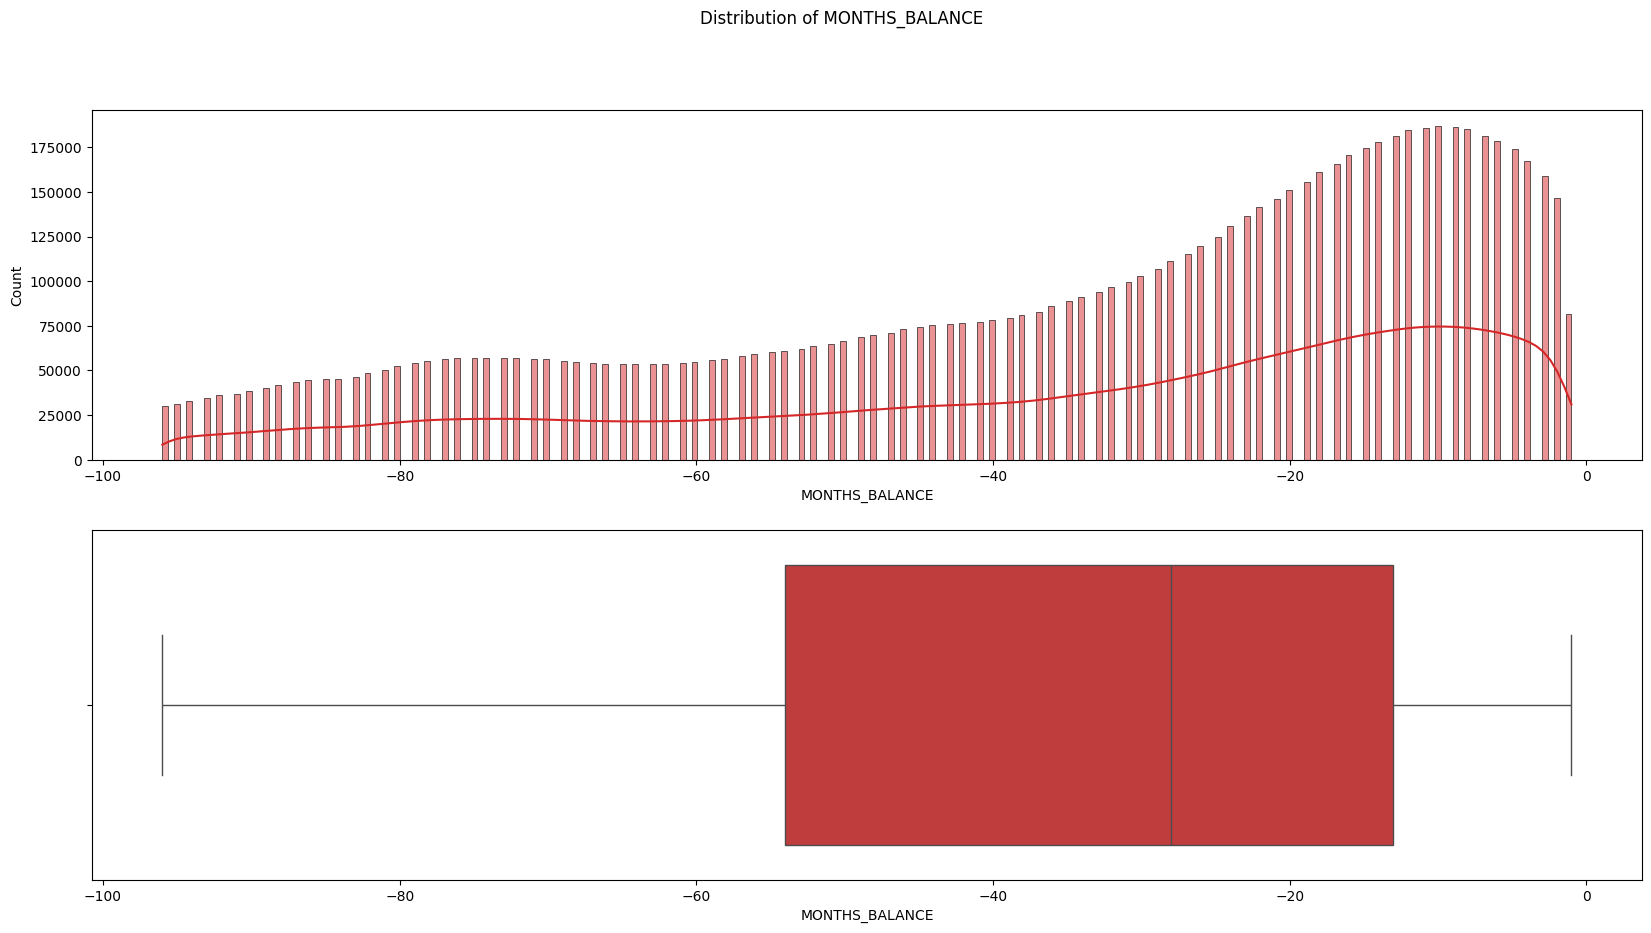

CNT_INSTALMENT
count    8.521512e+06
mean     1.703348e+01
std      1.200430e+01
min      1.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_INSTALMENT, dtype: float64


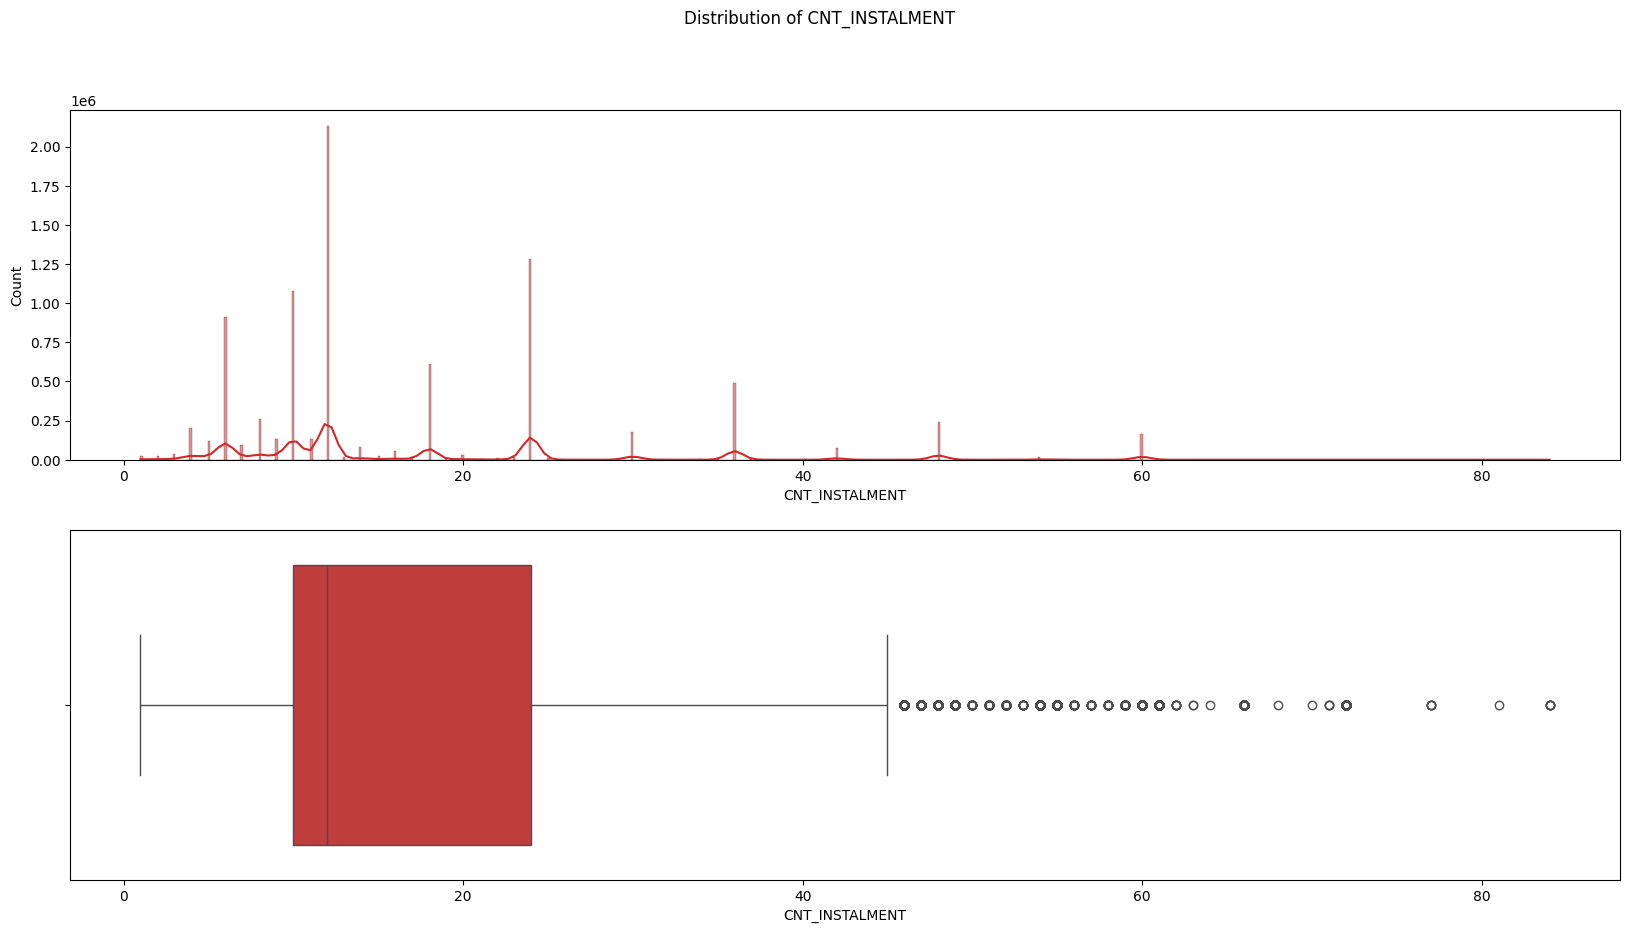

CNT_INSTALMENT_FUTURE
count    8.521497e+06
mean     1.046808e+01
std      1.114408e+01
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.400000e+01
max      8.400000e+01
Name: CNT_INSTALMENT_FUTURE, dtype: float64


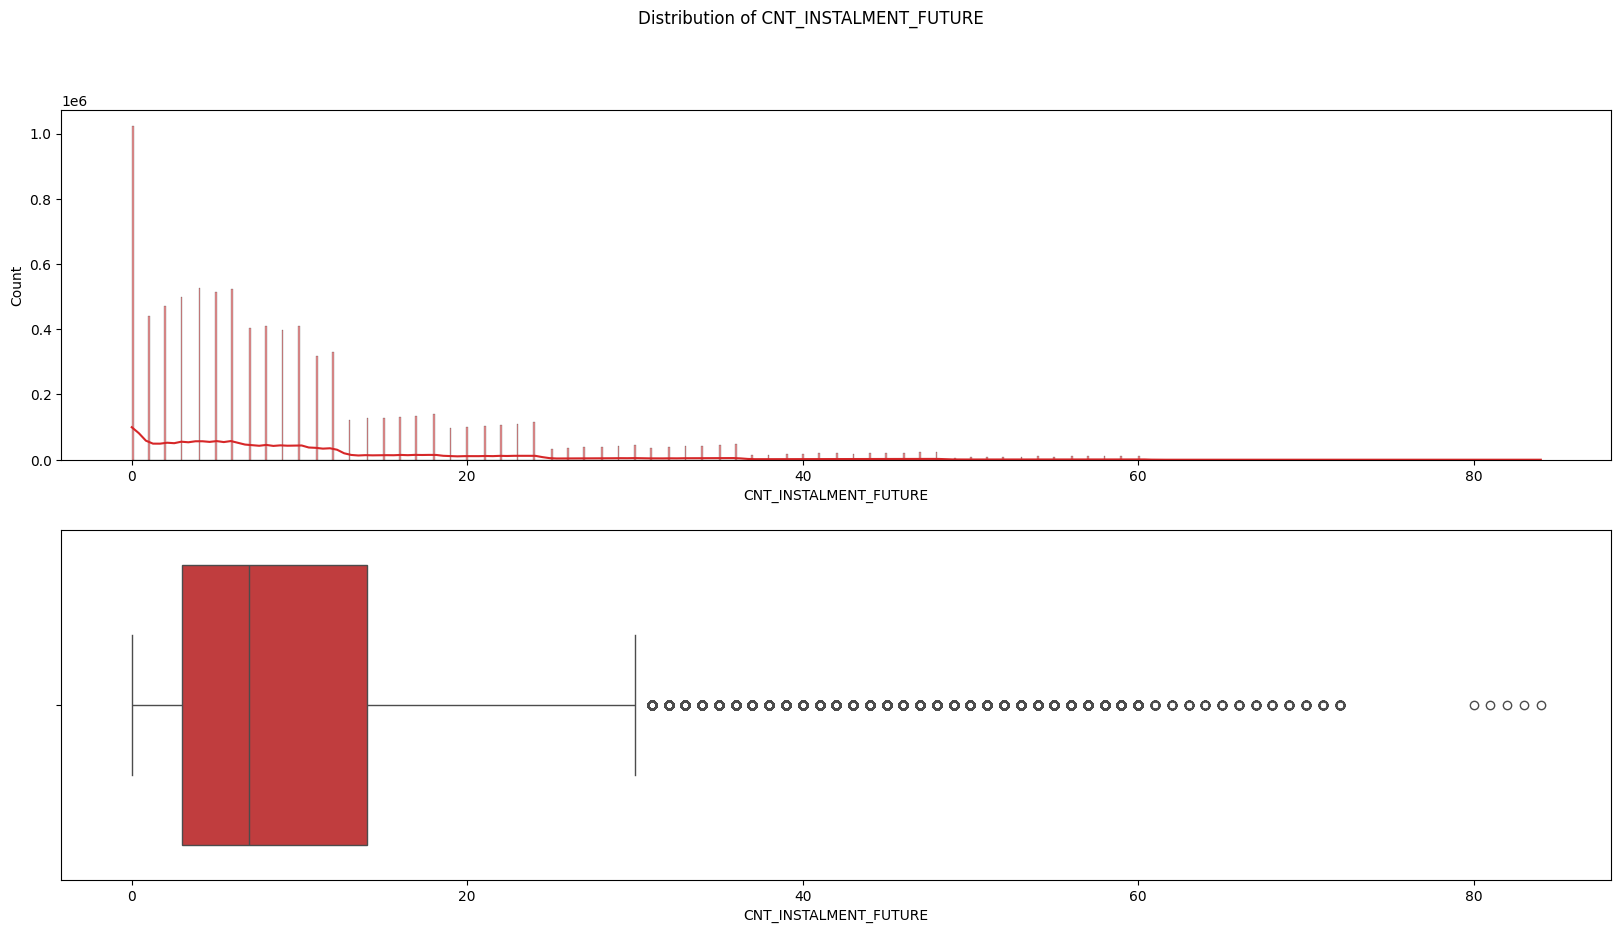

SK_DPD
count    8.543375e+06
mean     1.190473e+01
std      1.340302e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.231000e+03
Name: SK_DPD, dtype: float64


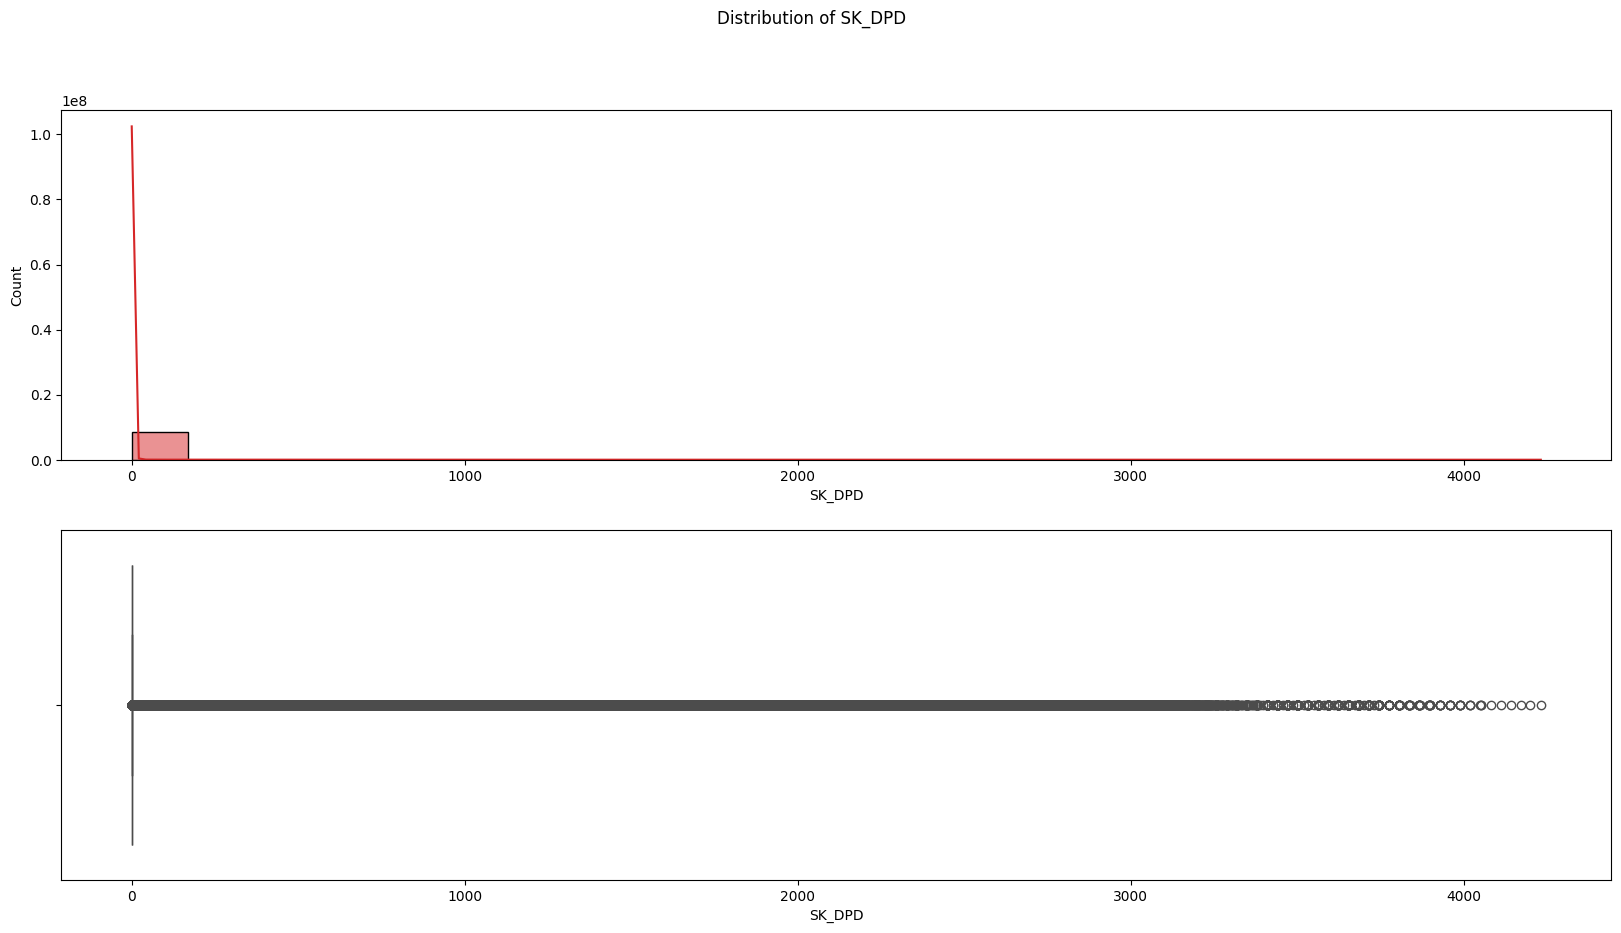

SK_DPD_DEF
count    8.543375e+06
mean     5.835209e-01
std      3.042110e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.373000e+03
Name: SK_DPD_DEF, dtype: float64


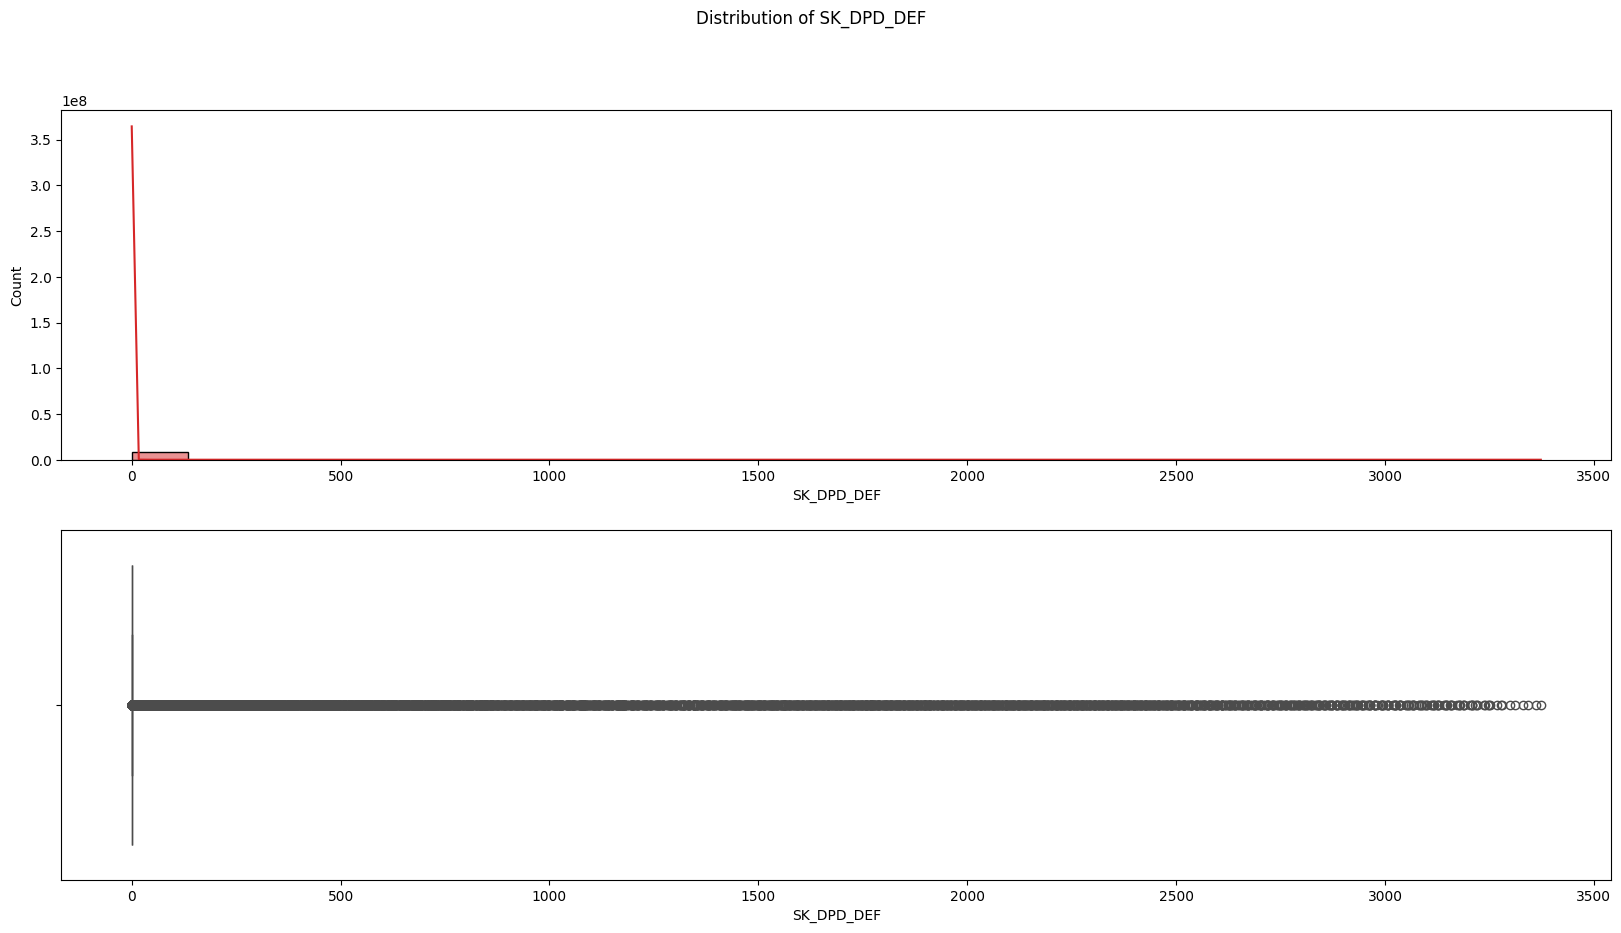

In [12]:
for c in num_cols:
    print(c)
    univariate.visualize_numeric(x=c, kde=True)

## Categorical feature

## NAME_CONTRACT_STATUS

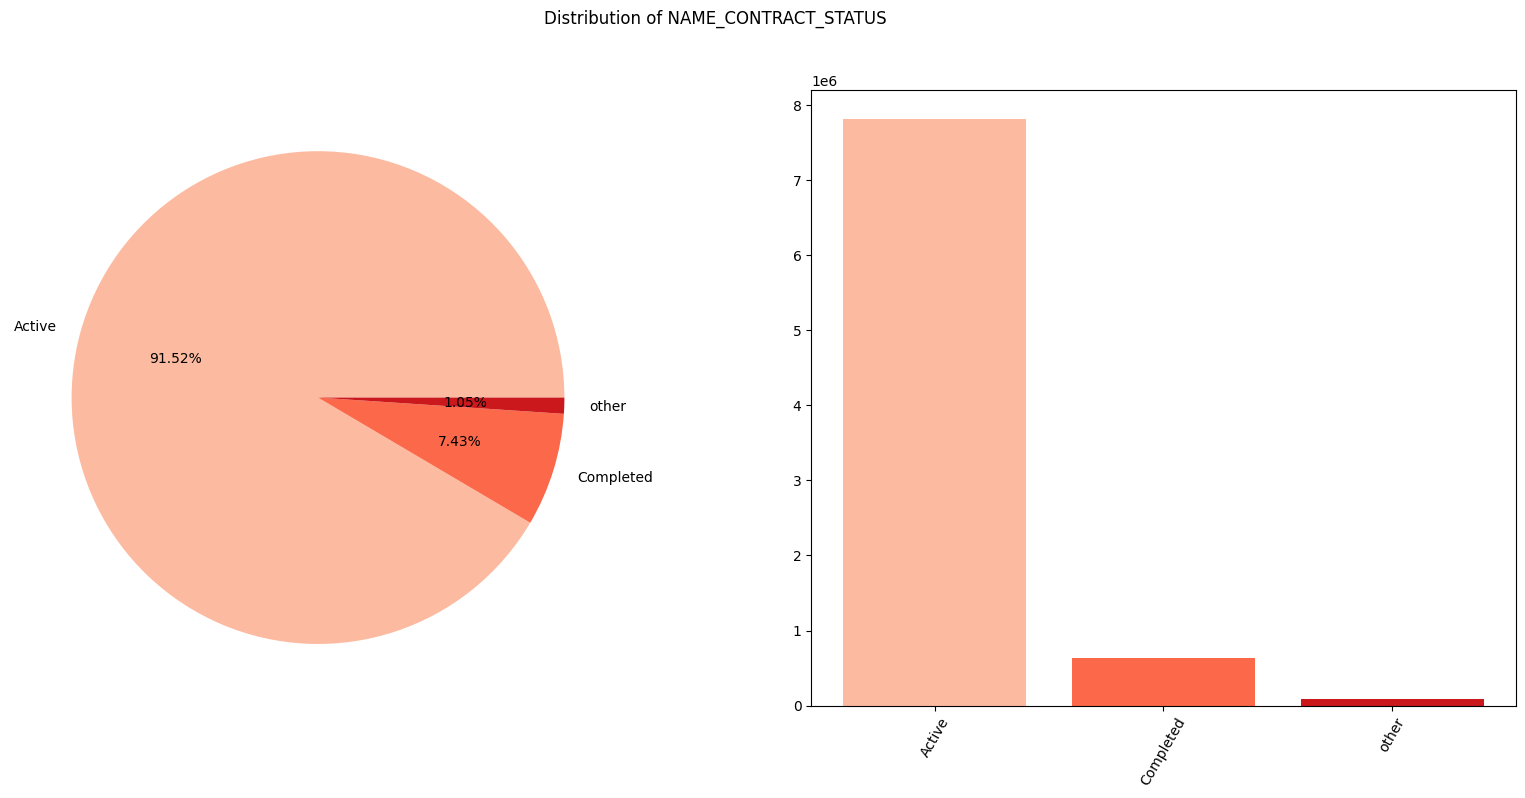

In [13]:
univariate.visualize('NAME_CONTRACT_STATUS', rotate=60, create_other=True)

Almost all the customers contract status is Active. Around 7% is completed and the small porportion are for the remain status

# Bivariate Analysis

In [14]:
curr = pd.read_csv('D:/Data Preparation final project group 2/Data/dseb63_application_train.csv')
pos_merged = pd.merge(curr[['SK_ID_CURR', 'TARGET']], pos, how='left', on='SK_ID_CURR')
pos_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,278621,0,2396755.0,-66.0,12.0,1.0,Active,0.0,0.0
1,278621,0,2636178.0,-23.0,6.0,1.0,Active,0.0,0.0
2,278621,0,1810518.0,-23.0,12.0,10.0,Active,0.0,0.0
3,278621,0,1810518.0,-25.0,12.0,12.0,Active,0.0,0.0
4,278621,0,2396755.0,-67.0,12.0,2.0,Active,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6848110,258328,0,1743609.0,-28.0,12.0,7.0,Active,0.0,0.0
6848111,258328,0,1743609.0,-32.0,12.0,11.0,Active,0.0,0.0
6848112,258328,0,1359084.0,-10.0,12.0,7.0,Active,0.0,0.0
6848113,258328,0,1743609.0,-25.0,12.0,4.0,Active,5.0,5.0


In [15]:
bia = BivariateAnalysis()

MONTHS_BALANCE


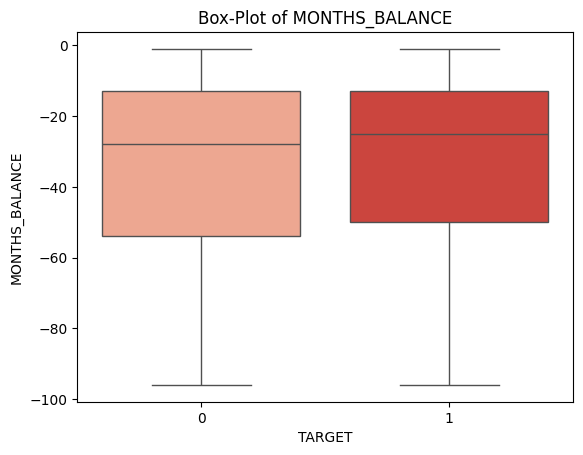

CNT_INSTALMENT


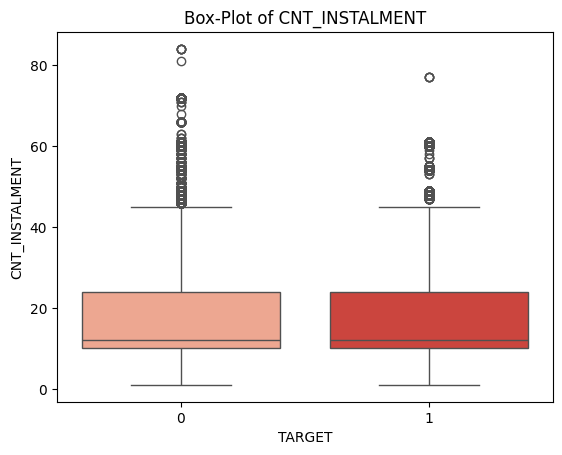

CNT_INSTALMENT_FUTURE


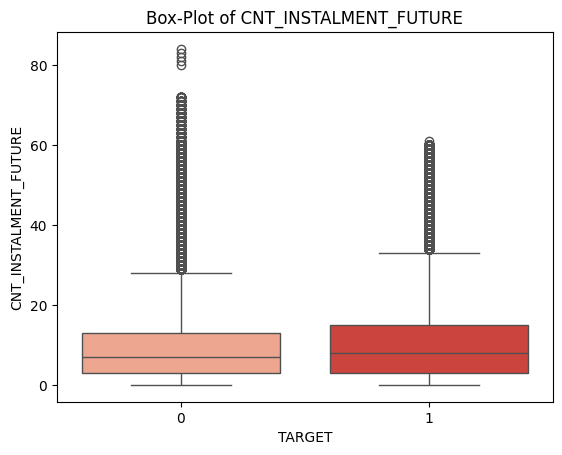

SK_DPD


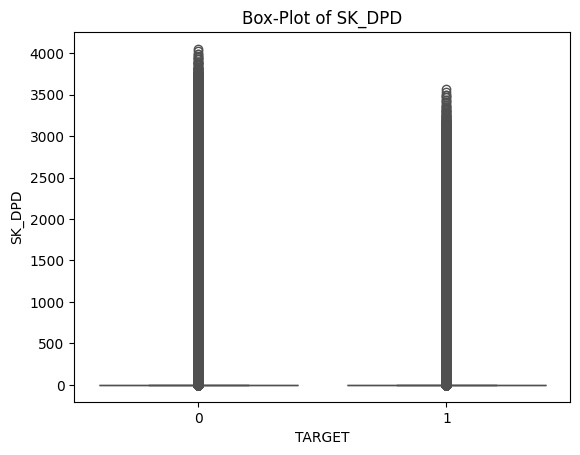

SK_DPD_DEF


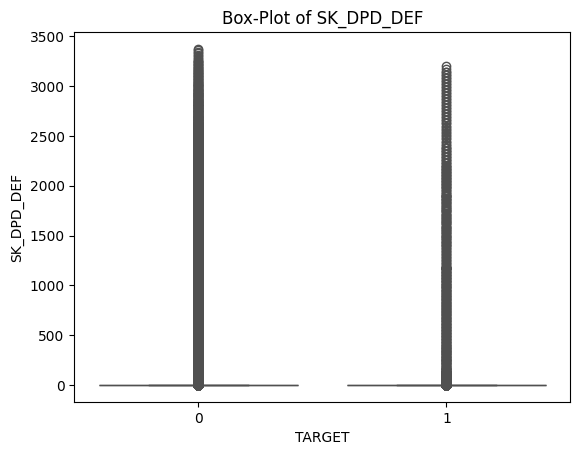

In [16]:
for c in num_cols:
    print(c)
    bia.box_plot(y=c, data_to_plot=pos_merged)

- According to the boxplots, Defaulters tend to have shorter MONTH_BALANCES compare to Non-defaulter. Which means they seems to make loan more frequently.
- Defaulters also have higher CNT_INSTALMENT_FUTURE (Installments left to pay on the previous credit) than Non - defaulters

In [17]:
## get the most recent record of each customer
pos_filter = pos.sort_values(by=['MONTHS_BALANCE']).groupby(['SK_ID_PREV', 'SK_ID_CURR'], as_index=False).last()
pos_filter

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1000001,117953,-8,2.0,0.0,Completed,0,0
1,1000003,6707,-1,12.0,9.0,Active,0,0
2,1000004,187620,-22,7.0,0.0,Completed,0,0
3,1000005,83759,-46,10.0,0.0,Completed,0,0
4,1000007,25033,-1,6.0,2.0,Active,0,0
...,...,...,...,...,...,...,...,...
800332,2843494,70155,-24,2.0,0.0,Completed,0,0
800333,2843495,274857,-9,7.0,0.0,Completed,0,0
800334,2843497,50590,-1,24.0,4.0,Active,0,0
800335,2843498,12906,-42,6.0,0.0,Completed,0,0


In [18]:
pos_filter.duplicated(subset=['SK_ID_CURR']).sum()

510893

In [19]:
pos_filter['FLAG_COMPLETED'] = pos_filter['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if x == 'Completed' else 0)
pos_filter['NFLAG_COMPLETED'] = pos_filter.groupby(['SK_ID_CURR'])['FLAG_COMPLETED'].transform('sum')
pos_filter.drop(columns=['FLAG_COMPLETED'], inplace=True)
pos_filter

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NFLAG_COMPLETED
0,1000001,117953,-8,2.0,0.0,Completed,0,0,1
1,1000003,6707,-1,12.0,9.0,Active,0,0,1
2,1000004,187620,-22,7.0,0.0,Completed,0,0,7
3,1000005,83759,-46,10.0,0.0,Completed,0,0,1
4,1000007,25033,-1,6.0,2.0,Active,0,0,1
...,...,...,...,...,...,...,...,...,...
800332,2843494,70155,-24,2.0,0.0,Completed,0,0,3
800333,2843495,274857,-9,7.0,0.0,Completed,0,0,3
800334,2843497,50590,-1,24.0,4.0,Active,0,0,6
800335,2843498,12906,-42,6.0,0.0,Completed,0,0,8


In [20]:
nflag_completed_group = pos_filter.groupby(['NFLAG_COMPLETED']).size()
nflag_completed_group

NFLAG_COMPLETED
0      38228
1     157471
2     176327
3     144492
4     103603
5      68800
6      43431
7      26995
8      16475
9       9683
10      5776
11      3369
12      2277
13      1235
14       836
15       525
16       335
17       190
18       158
19        19
20        41
21        45
24        26
dtype: int64

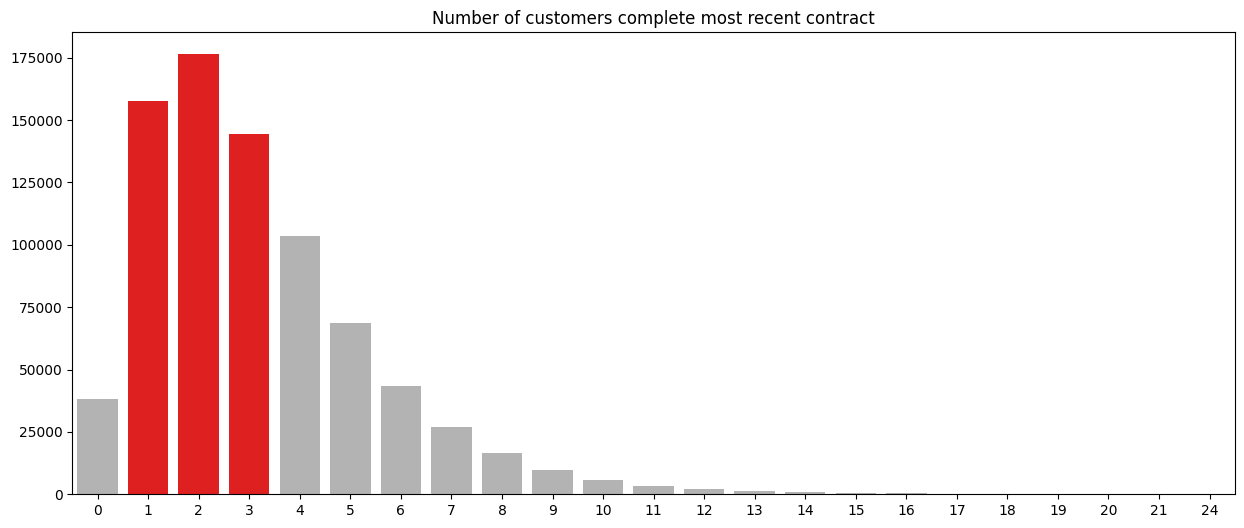

In [21]:
# Get the indices of the three highest values
top3_indices = nflag_completed_group.nlargest(3).index

# Define a custom palette with red for the top 3 values and grey with decreased alpha for others
custom_palette = ['red' if i in top3_indices else (0.7, 0.7, 0.7, 0.5) for i in nflag_completed_group.index]

# Create the bar plot with the custom palette
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=list(nflag_completed_group.index), y=list(nflag_completed_group.values), palette=custom_palette, ax=ax)
ax.set_title('Number of customers complete most recent contract')
plt.show()


- Most of the customers complete 2 payments, follows by 1 and 3 payments
- The higher the number of the payments, the lower the number of customers can complete it

## PAST DUE

In [22]:
def pastdue_flag(x):
    if x['SK_DPD_DEF'] > 0 and x['CNT_INSTALMENT_FUTURE'] > 0:
        return 1
    else:
        return 0

pos_filter['FLAG_PASTDUE'] = pos_filter.apply(pastdue_flag, axis= 1)
pos_filter

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NFLAG_COMPLETED,FLAG_PASTDUE
0,1000001,117953,-8,2.0,0.0,Completed,0,0,1,0
1,1000003,6707,-1,12.0,9.0,Active,0,0,1,0
2,1000004,187620,-22,7.0,0.0,Completed,0,0,7,0
3,1000005,83759,-46,10.0,0.0,Completed,0,0,1,0
4,1000007,25033,-1,6.0,2.0,Active,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
800332,2843494,70155,-24,2.0,0.0,Completed,0,0,3,0
800333,2843495,274857,-9,7.0,0.0,Completed,0,0,3,0
800334,2843497,50590,-1,24.0,4.0,Active,0,0,6,0
800335,2843498,12906,-42,6.0,0.0,Completed,0,0,8,0


In [23]:
pos_filter['NFLAG_PASTDUE'] = pos_filter.groupby(['SK_ID_CURR'])['FLAG_PASTDUE'].transform('sum')
pos_filter.drop(columns=['FLAG_PASTDUE'], inplace=True)
pos_filter

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NFLAG_COMPLETED,NFLAG_PASTDUE
0,1000001,117953,-8,2.0,0.0,Completed,0,0,1,0
1,1000003,6707,-1,12.0,9.0,Active,0,0,1,0
2,1000004,187620,-22,7.0,0.0,Completed,0,0,7,0
3,1000005,83759,-46,10.0,0.0,Completed,0,0,1,0
4,1000007,25033,-1,6.0,2.0,Active,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
800332,2843494,70155,-24,2.0,0.0,Completed,0,0,3,0
800333,2843495,274857,-9,7.0,0.0,Completed,0,0,3,0
800334,2843497,50590,-1,24.0,4.0,Active,0,0,6,0
800335,2843498,12906,-42,6.0,0.0,Completed,0,0,8,0


In [27]:
nflag_pastdue_group = pos_filter.groupby(['NFLAG_PASTDUE']).size()[1:]
nflag_pastdue_group

NFLAG_PASTDUE
1    4472
2     431
3     110
4      16
dtype: int64

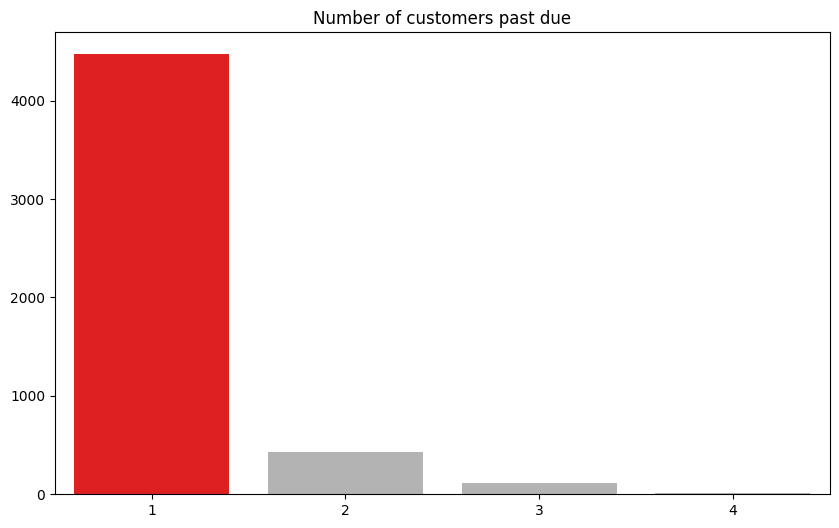

In [25]:

# Get the index of the highest value
max_index = nflag_pastdue_group.idxmax()

# Define a custom palette with red for the highest value and grey with varying alpha for others
custom_palette = ['red' if i == max_index else (0.7, 0.7, 0.7, 0.3 + 0.2 * (nflag_pastdue_group[i] / nflag_pastdue_group[max_index])) for i in nflag_pastdue_group.index]

# Create the bar plot with the custom palette
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=list(nflag_pastdue_group.index), y=list(nflag_pastdue_group.values), palette=custom_palette, ax=ax)
ax.set_title('Number of customers past due')
plt.show()